In [1]:
####################
import pickle
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt, ticker as mticker
from matplotlib.ticker import StrMethodFormatter, NullFormatter
import seaborn as sns
import matplotlib.transforms as mtransforms

sns.set_theme(context = "notebook",style="ticks", palette='bright')

plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.autolayout"] = False
plt.rcParams["axes.labelsize"] = 30
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["xtick.labelsize"] = 30
plt.rcParams["ytick.labelsize"] = 30
plt.rcParams["font.size"] = 30
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 10
plt.rcParams["legend.fontsize"] = 30
plt.rcParams['grid.color'] = "#949292"
plt.rcParams['font.sans-serif'] = "Times New Roman"
plt.rcParams['font.family'] = "sans-serif"
legend_properties = {'weight':'bold'}
plt.rcParams['mathtext.fontset'] = 'cm'

####################

In [2]:
lineStyle = ['s-','o-','d-','^-.','*--','s-']
color = ['blue','red','black','magenta','blue','green']
markerFace = ['white','white','white','magenta','blue','green']
markerEdge = ["blue","red","black","black","black","black"]

/var/folders/h6/2bpy6_vs04d09qrlzp790bd00000gn/T/ipykernel_18201/761370372.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


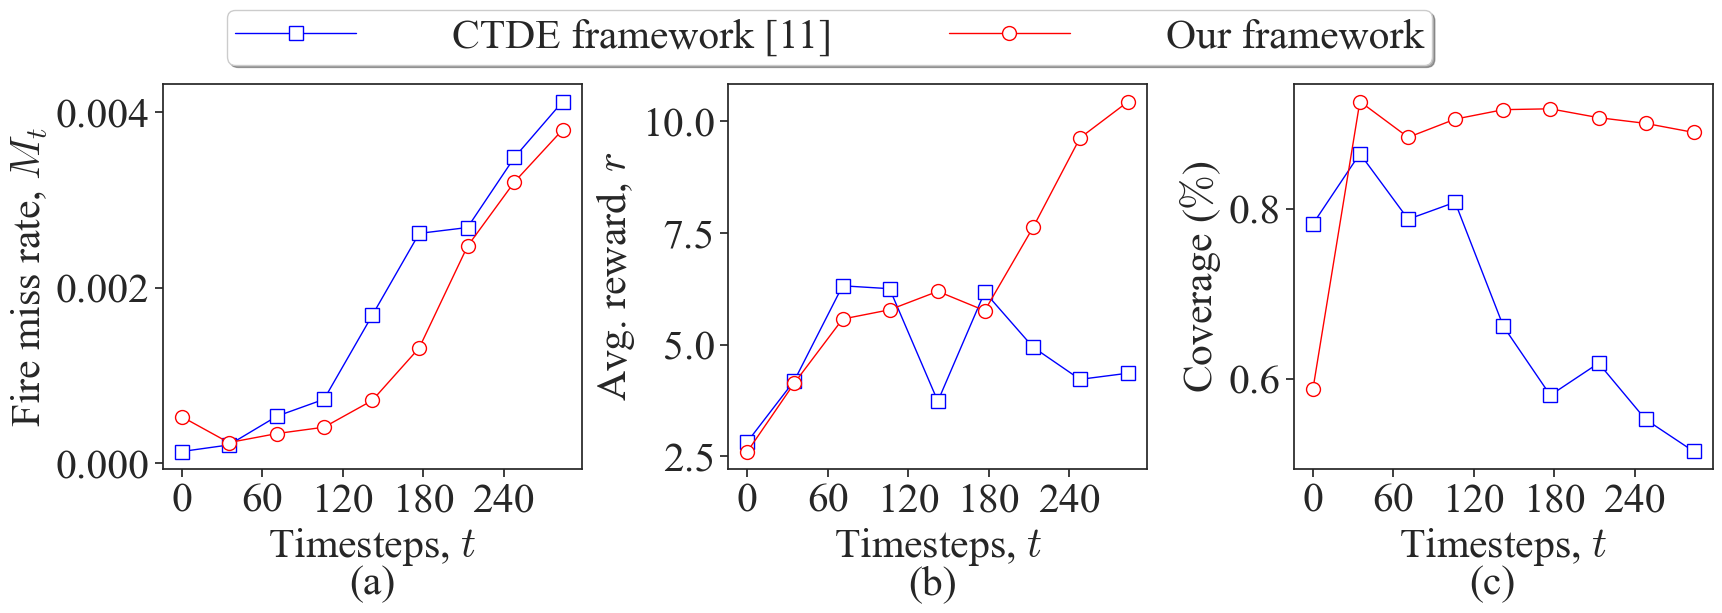

In [4]:
file_paths = ["CTDE/models/t2023-08-17 16_43_57.654315", "CRADLE/models/t2023-08-22 12_49_13.724368"]
# file_paths = ['viseras', 'cradle']
labelList = ["CTDE framework [11]", "Our framework"]

fig, ax = plt.subplots(1, 3, figsize=(20, 5), gridspec_kw={'hspace': 0.2, 'wspace': 0.35})

n = 30
for idx, file_path in enumerate(file_paths):
    miss_history = np.loadtxt(file_path + "/miss_history.csv", delimiter=",", dtype=np.float32)
    miss_history = np.mean(miss_history, axis = 1)
    x_axis = np.linspace(0, len(miss_history), int(len(miss_history)/n), dtype= np.int32)
    y_axis = []
    y_axis_least = []
    for i in range(len(x_axis)-1):
        y_axis.append(np.mean(miss_history[x_axis[i]:x_axis[(i+1)]]))
        y_axis_least.append(np.min(miss_history[x_axis[i]:x_axis[(i+1)]]))

    ax[0].plot(x_axis[:-1], y_axis, lineStyle[idx], color=color[idx], 
        markerfacecolor=markerFace[idx], markeredgecolor=markerEdge[idx],label= labelList[idx])

ax[0].set_xlabel("Timesteps, $t$")
ax[0].set_ylabel("Fire miss rate, $M_t$")
# ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0].xaxis.set_major_locator(plt.MaxNLocator(6))

# ax[0].legend(loc ='lower right', ncol=1, fancybox=True, shadow=True,
#           borderpad=0.2,labelspacing=0.3, handlelength=1.9,columnspacing=0.5,handletextpad=0.2)

# plt.grid()
# plt.show()

n = 30
for idx, file_path in enumerate(file_paths):
    reward_history = np.loadtxt(file_path + "/reward_history.csv", delimiter=",", dtype=np.float32).mean(axis = 1)
    # plt.plot(reward_history)
    x_axis = np.linspace(0, len(reward_history), int(len(reward_history)/n), dtype= np.int32)
    y_axis = []
    y_axis_least = []
    for i in range(len(x_axis)-1):
        y_axis.append(np.mean(reward_history[x_axis[i]:x_axis[(i+1)]]))
        y_axis_least.append(np.min(reward_history[x_axis[i]:x_axis[(i+1)]]))

    ax[1].plot(x_axis[:-1], y_axis, lineStyle[idx], color=color[idx], 
        markerfacecolor=markerFace[idx], markeredgecolor=markerEdge[idx],label= labelList[idx])

ax[1].set_xlabel("Timesteps, $t$")
ax[1].set_ylabel("Avg. reward, $r$")
# ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(6))

# ax[1].legend(loc ='lower right', ncol=1, fancybox=True, shadow=True,
#           borderpad=0.2,labelspacing=0.3, handlelength=1.9,columnspacing=0.5,handletextpad=0.2)

# plt.grid()
# plt.show()

n = 30
for idx, file_path in enumerate(file_paths):
    coverage_history = np.loadtxt(file_path + "/coverage_history.csv", delimiter=",", dtype=np.float32)
    x_axis = np.linspace(0, len(coverage_history), int(len(coverage_history)/n), dtype= np.int32)
    y_axis = []
    y_axis_least = []
    for i in range(len(x_axis)-1):
        y_axis.append(np.mean(coverage_history[x_axis[i]:x_axis[(i+1)]]))
        y_axis_least.append(np.min(coverage_history[x_axis[i]:x_axis[(i+1)]]))

    ax[2].plot(x_axis[:-1], y_axis, lineStyle[idx], color=color[idx], 
        markerfacecolor=markerFace[idx], markeredgecolor=markerEdge[idx],label= labelList[idx])

ax[2].set_xlabel("Timesteps, $t$")
ax[2].set_ylabel("Coverage ($\%$)")
# ax[2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[2].xaxis.set_major_locator(plt.MaxNLocator(6))

handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc ='upper right', bbox_to_anchor=(0.77, 1.07), #0.25,-1,
         ncol=2, fancybox=True, shadow=True,
          borderpad=0.2,labelspacing=2.9, handlelength=2.9,columnspacing=2.8,handletextpad=2.3)

fig.text(0.23, -0.12, '(a)', ha='center', va='center', fontsize=30)
fig.text(0.51, -0.12, '(b)', ha='center', va='center', fontsize=30)
fig.text(0.79, -0.12, '(c)', ha='center', va='center', fontsize=30)
fig.tight_layout()
# plt.grid()
# plt.ylim(0, 1) 
plt.savefig("testing_plot.pdf")
plt.show()